In [39]:
# imports
import numpy as np
import math
import matplotlib.pyplot as plt

# 3.2

In [40]:
# initialization of matricies
A = np.array([[1, 0, 0, 0],
              [0, 1, 0, 0],
              [0, 0, 1, 0],
              [0, 0, 0, 1],
              [1, -1, 0, 0],
              [1, 0, -1, 0],
              [1, 0, 0, -1],
              [0, 1, -1, 0],
              [0, 1, 0, -1],
              [0, 0, 1, -1]])
b = np.array([2.95, 1.74, -1.45, 1.32, 1.23, 4.45, 1.61, 3.21, 0.45, -2.75]).reshape(-1,1)

# solving for both solutions using numpy's least sqaures method
s = np.linalg.lstsq(A, b, rcond=None)

# printing the results
print("The best values for the altitudes are", str(s[0][0][0])+",", str(s[0][1][0])+",", str(s[0][2][0]) + ", and", str(s[0][3][0]), "respectfully.")
print("These altitude values match extremly well with the direct measurements!")

The best values for the altitudes are 2.9599999999999995, 1.745999999999999, -1.4600000000000004, and 1.3139999999999994 respectfully.
These altitude values match extremly well with the direct measurements!


## 3.4

In [41]:
# initialization of matricies
A = np.array([[0.16, 0.10],
              [0.17, 0.11],
              [2.02, 1.29]])
b = np.array([0.26, 0.28, 3.31]).reshape(-1, 1)
b_p = np.array([0.27, 0.25, 3.33]).reshape(-1, 1)

# solving for both solutions using numpy's least sqaures method
s = np.linalg.lstsq(A, b, rcond=None)
s_p = np.linalg.lstsq(A, b_p, rcond=None)


(a)

In [42]:
print("The values for x1 and x2 using the non-preturbed RHS are", str(s[0][0][0]) + " and " + str(s[0][1][0]) + " respectfully.")


The values for x1 and x2 using the non-preturbed RHS are 0.9999999999999487 and 1.00000000000008 respectfully.


(b)

In [43]:
print("The values for x1 and x2 using the preturbed RHS are", str(s_p[0][0][0]) + " and " + str(s_p[0][1][0]) + " respectfully.")


The values for x1 and x2 using the preturbed RHS are 7.008887308923287 and -8.395662993246317 respectfully.


(c)

In [44]:
print("The results of both solutions are staggeringly different!")
print("There are two possible issues with this system that could make this problem arise.\n")

# first issue 
print("The first issue that can arise is that the b vector is nearly orthogonal to the span of A.")
print("To verify this we will find a orthonormal basis of A and compare b to its vectors.")
# compare RHS to basis of A via QR factorization and dot product
ortho_basis = np.linalg.qr(A)[0]
b1 = np.dot(ortho_basis[:,0],b)
b2 = np.dot(ortho_basis[:,1],b)
bp1 = np.dot(ortho_basis[:,0],b_p)
bp2 = np.dot(ortho_basis[:,1],b_p)
print("The dot products of the non-perterbed RHS to the basis vectors of A are: " + str(b1) + " and " + str(b2) + ".")
print("The dot products of the perterbed RHS to the basis vectors of A are: " + str(bp1) + " and " + str(bp2) + ".")
print("As we can see that in both cases the RHS is almost orthogonal to one of the basis vector of A.\n")

# second issue
print("The second issue that can arise is that the least squares problem is ill-conditioned.")
print("To verify this we can calculate the condition value for the system and examine it.")
# calculate cond value for A
A_cond = np.linalg.cond(A)
print("The condition value for this system is " + str(A_cond) + ", which is slightly high.\n")

# conclusion
print("I believe that a combination of both these issues is what is causing the drastic changes in solutions.")


The results of both solutions are staggeringly different!
There are two possible issues with this system that could make this problem arise.

The first issue that can arise is that the b vector is nearly orthogonal to the span of A.
To verify this we will find a orthonormal basis of A and compare b to its vectors.
The dot products of the non-perterbed RHS to the basis vectors of A are: [-3.33198037] and [-0.00260827].
The dot products of the perterbed RHS to the basis vectors of A are: [-3.35012691] and [0.02189815].
As we can see that in both cases the RHS is almost orthogonal to one of the basis vector of A.

The second issue that can arise is that the least squares problem is ill-conditioned.
To verify this we can calculate the condition value for the system and examine it.
The condition value for this system is 1097.5386765222238, which is slightly high.

I believe that a combination of both these issues is what is causing the drastic changes in solutions.


In [45]:
ortho_basis

array([[-0.07868419,  0.83357047],
       [-0.08360195, -0.55206658],
       [-0.9933879 , -0.01956433]])

## Bonus

In [46]:
# initialize matricies
start_year = 1970
A = np.array([[1, 1971 - start_year],
              [1, 1972 - start_year],
              [1, 1974 - start_year],
              [1, 1978 - start_year],
              [1, 1982 - start_year],
              [1, 1985 - start_year],
              [1, 1989 - start_year],
              [1, 1993 - start_year],
              [1, 1997 - start_year],
              [1, 1999 - start_year],
              [1, 2000 - start_year],
              [1, 2002 - start_year],
              [1, 2003 - start_year]])
b = np.log(np.array([2.25e3, 2.5e3, 5e3, 2.9e4, 1.2e5, 2.75e5, 1.18e6, 3.1e6, 7.5e6, 2.4e7, 4.2e7, 2.2e8, 4.1e8]).reshape(-1, 1))


(a)

Theta 1:  15737763.16609627
Theta 2:  2.262767669811653 



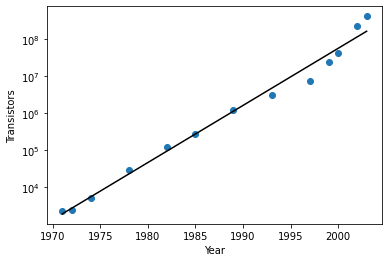

In [47]:
# solve and print solution
s = np.linalg.lstsq(A, b, rcond=None)
theta_1 = s[0][0][0]
theta_2 = s[0][1][0]

# print theta values
print("Theta 1: ", math.pow(10, theta_1))
print("Theta 2: ", math.pow(10, theta_2), "\n")

# calculate line y values
y1 = math.pow(math.e, theta_1 + theta_2 * 1)
y2 = math.pow(math.e, theta_1 + theta_2 * 33)

# plotting
# scatterplot points 
x = np.array([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003])
y = np.array([2.25e3, 2.5e3, 5e3, 2.9e4, 1.2e5, 2.75e5, 1.18e6, 3.1e6, 7.5e6, 2.4e7, 4.2e7, 2.2e8, 4.1e8])

# display plot
plt.scatter(x, y)
plt.plot([1971, 2003], [y1, y2], 'k-')
plt.yscale("symlog")
plt.xlabel("Year")
plt.ylabel("Transistors")
plt.show()

(b)

In [48]:
# calculate transister count
transistor_count = math.pow(math.e, theta_1 + theta_2 * (2015 - 1970))

# calculate difference and report 
dif = transistor_count - 4e9
print("Approximate number of transistors in 2015: ", transistor_count)
print("This is ", dif, "more transistors than were actually produced in 2015")

Approximate number of transistors in 2015:  11387036868.698685
This is  7387036868.698685 more transistors than were actually produced in 2015


(c)

In [49]:
print("My model predicts that it will take about one year to double the number of transistors.")
print("This is about 33% faster than the prediction made by moore")

My model predicts that it will take about one year to double the number of transistors.
This is about 33% faster than the prediction made by moore
